# Importing Libraries

In [1]:
import pandas as pd  # For handling the dataset
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.models import Sequential  # To define neural network models
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional  # Layers for models
from tensorflow.keras.optimizers import Adam  # Optimizer for training models


# Load and Explore the Dataset

In [2]:
# Load the dataset
file_path = '/kaggle/input/fake-news-detection-in-dravidian-language/Fake_train.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.head())  # Display the first few rows


                                                text     label
0                  നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ      Fake
1                                        Masha Allah      Fake
2  അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...      Fake
3    Illathentha avaru purath vidayittalland verenth      Fake
4  Barana pakshathin matoru niyamam.nalla moyanth...  original


In [3]:
print(data.info())  # Dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3257 entries, 0 to 3256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3257 non-null   object
 1   label   3257 non-null   object
dtypes: object(2)
memory usage: 51.0+ KB
None


# Preprocessing the Data

In [4]:
# Encode labels (Fake -> 0, Original -> 1)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad sequences
max_length = 50
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, data['label'], test_size=0.2, random_state=42)


# Define and Compile RNN Model

In [5]:
def create_rnn_model(vocab_size, embed_dim, max_length):
    model = Sequential([
        Embedding(vocab_size, embed_dim),
        SimpleRNN(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the RNN model
vocab_size = 10000
embed_dim = 128
rnn_model = create_rnn_model(vocab_size, embed_dim, max_length)

# Train the RNN model
rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5665 - loss: 0.6859 - val_accuracy: 0.6426 - val_loss: 0.6492
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5816 - loss: 0.6696 - val_accuracy: 0.4816 - val_loss: 0.7006
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5388 - loss: 0.6879 - val_accuracy: 0.4371 - val_loss: 0.7272
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5826 - loss: 0.6720 - val_accuracy: 0.6380 - val_loss: 0.6515
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7980 - loss: 0.4920 - val_accuracy: 0.6994 - val_loss: 0.6478


# Define and Compile LSTM Model

In [6]:
def create_lstm_model(vocab_size, embed_dim, max_length):
    model = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_length),
        LSTM(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the LSTM model
lstm_model = create_lstm_model(vocab_size, embed_dim, max_length)

# Train the LSTM model
lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5322 - loss: 0.6921 - val_accuracy: 0.5353 - val_loss: 0.6831
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6088 - loss: 0.6677 - val_accuracy: 0.5445 - val_loss: 0.6853
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5992 - loss: 0.6471 - val_accuracy: 0.6503 - val_loss: 0.6478
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6753 - loss: 0.6110 - val_accuracy: 0.6610 - val_loss: 0.6396
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7114 - loss: 0.5758 - val_accuracy: 0.6810 - val_loss: 0.6199


# Define and Compile GRU Model

In [7]:
def create_gru_model(vocab_size, embed_dim, max_length):
    model = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_length),
        GRU(64, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the GRU model
gru_model = create_gru_model(vocab_size, embed_dim, max_length)

# Train the GRU model
gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5235 - loss: 0.6922 - val_accuracy: 0.4893 - val_loss: 0.6943
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5263 - loss: 0.6895 - val_accuracy: 0.4877 - val_loss: 0.6945
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5631 - loss: 0.6806 - val_accuracy: 0.4893 - val_loss: 0.7001
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5551 - loss: 0.6813 - val_accuracy: 0.4939 - val_loss: 0.6973
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5373 - loss: 0.6733 - val_accuracy: 0.6825 - val_loss: 0.5943


# Define and Compile Bi-LSTM Model

In [8]:
def create_bilstm_model(vocab_size, embed_dim, max_length):
    model = Sequential([
        Embedding(vocab_size, embed_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the Bi-LSTM model
bilstm_model = create_bilstm_model(vocab_size, embed_dim, max_length)

# Train the Bi-LSTM model
bilstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)


Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5766 - loss: 0.6755 - val_accuracy: 0.7301 - val_loss: 0.5435
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8529 - loss: 0.3819 - val_accuracy: 0.7730 - val_loss: 0.4704
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9419 - loss: 0.1623 - val_accuracy: 0.7975 - val_loss: 0.4578
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9674 - loss: 0.0859 - val_accuracy: 0.7899 - val_loss: 0.5462
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9825 - loss: 0.0476 - val_accuracy: 0.7837 - val_loss: 0.6191


In [9]:
# Create dictionaries to store accuracy values for each model
rnn_train_accuracy = rnn_model.history.history['accuracy']
rnn_val_accuracy = rnn_model.history.history['val_accuracy']

lstm_train_accuracy = lstm_model.history.history['accuracy']
lstm_val_accuracy = lstm_model.history.history['val_accuracy']

gru_train_accuracy = gru_model.history.history['accuracy']
gru_val_accuracy = gru_model.history.history['val_accuracy']

bilstm_train_accuracy = bilstm_model.history.history['accuracy']
bilstm_val_accuracy = bilstm_model.history.history['val_accuracy']


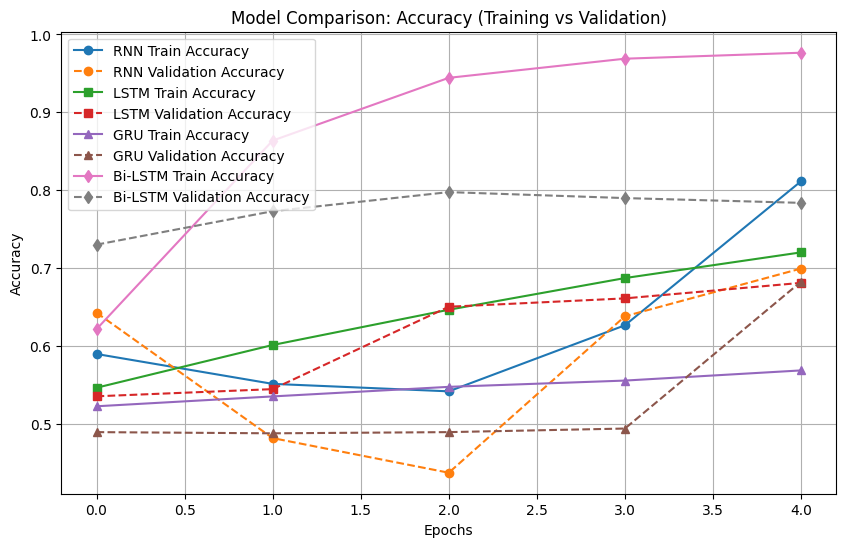

In [10]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each model's training and validation accuracy
plt.plot(rnn_train_accuracy, label='RNN Train Accuracy', linestyle='-', marker='o')
plt.plot(rnn_val_accuracy, label='RNN Validation Accuracy', linestyle='--', marker='o')

plt.plot(lstm_train_accuracy, label='LSTM Train Accuracy', linestyle='-', marker='s')
plt.plot(lstm_val_accuracy, label='LSTM Validation Accuracy', linestyle='--', marker='s')

plt.plot(gru_train_accuracy, label='GRU Train Accuracy', linestyle='-', marker='^')
plt.plot(gru_val_accuracy, label='GRU Validation Accuracy', linestyle='--', marker='^')

plt.plot(bilstm_train_accuracy, label='Bi-LSTM Train Accuracy', linestyle='-', marker='d')
plt.plot(bilstm_val_accuracy, label='Bi-LSTM Validation Accuracy', linestyle='--', marker='d')

# Set plot labels and title
plt.title('Model Comparison: Accuracy (Training vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
